In [1]:
import pandas as pd
import os

# Path to the directory containing CSV files
data_folder = 'data/'

# List to store individual DataFrames from each CSV file
dfs = []

# Iterate over each file in the directory
for filename in os.listdir(data_folder):
    if filename.endswith('.csv'):
        # Read the CSV file into a DataFrame and append it to the list
        filepath = os.path.join(data_folder, filename)
        df = pd.read_csv(filepath)
        dfs.append(df)

# Concatenate all DataFrames into one
combined_df = pd.concat(dfs, ignore_index=True)

# Path to the combined CSV file
output_file = 'combined_data4.csv'

# Write the combined DataFrame to a new CSV file
combined_df.to_csv(output_file, index=False)

print(f"Combined CSV file saved as '{output_file}'")

Combined CSV file saved as 'combined_data4.csv'


C:\Users\16475\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


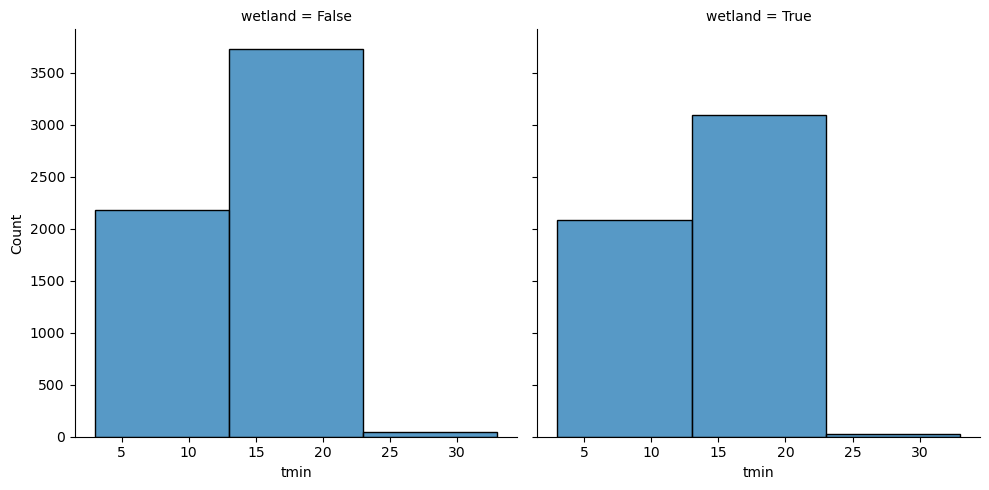

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import sklearn
import seaborn as sns

sns.displot(combined_df, x='tmin', col='wetland', binwidth=10, height=5)


C:\Users\16475\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


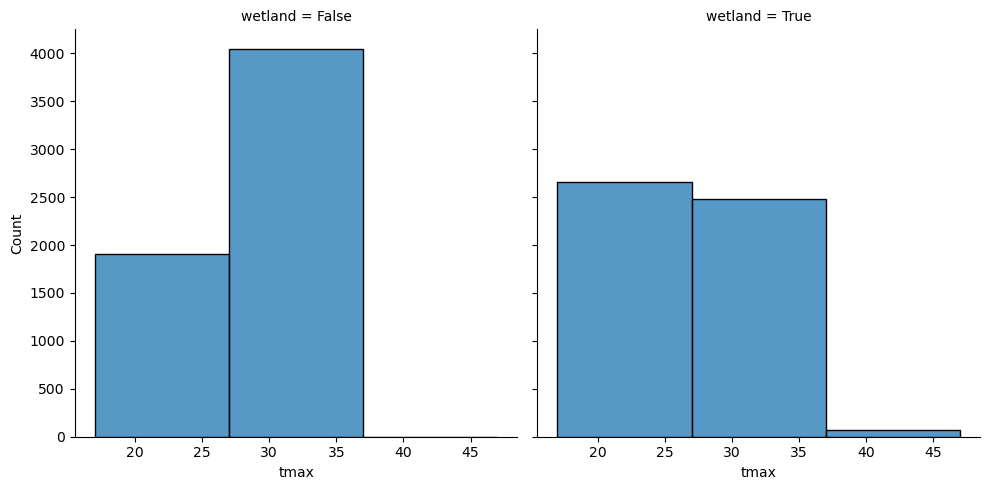

In [3]:
sns.displot(combined_df, x='tmax', col='wetland', binwidth=10, height=5)

C:\Users\16475\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


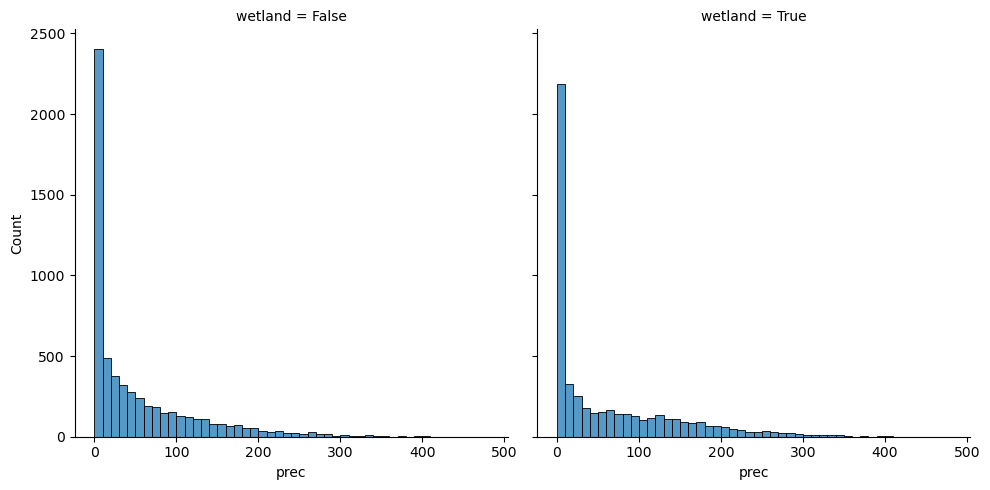

In [4]:
sns.displot(combined_df, x='prec', col='wetland', binwidth=10, height=5)

In [6]:
df_copy = combined_df.copy()

df_copy.drop('location', axis=1, inplace=True)
df_copy.tail()


,year,month,tmin,tmax,prec,wetland
11155,2021,8,10,24,5.5,False
11156,2021,9,12,26,10.4,False
11157,2021,10,14,29,22.2,False
11158,2021,11,17,29,69.3,False
11159,2021,12,18,29,107.4,False


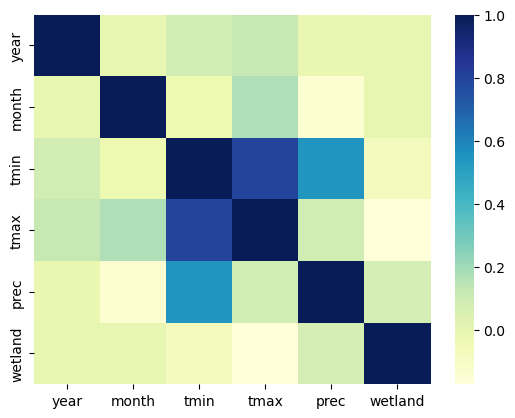

In [7]:
sns.heatmap(df_copy.corr(), cmap="YlGnBu")
plt.show()

In [8]:
df = pd.DataFrame(df_copy )

# Convert boolean values to integers
df['wetland'] = df['wetland'].astype(int)

# One-hot encode the 'wetland' column
#df = pd.get_dummies(df, columns=['wetland'], drop_first=True)

print(df)

       year  month  tmin  tmax   prec  wetland
0      1960      1    15    26   81.5        1
1      1960      2    15    25  166.9        1
2      1960      3    14    25   30.8        1
3      1960      4    12    24   96.3        1
4      1960      5     9    22   45.3        1
...     ...    ...   ...   ...    ...      ...
11155  2021      8    10    24    5.5        0
11156  2021      9    12    26   10.4        0
11157  2021     10    14    29   22.2        0
11158  2021     11    17    29   69.3        0
11159  2021     12    18    29  107.4        0

[11160 rows x 6 columns]


In [9]:
df.head()


,year,month,tmin,tmax,prec,wetland
0,1960,1,15,26,81.5,1
1,1960,2,15,25,166.9,1
2,1960,3,14,25,30.8,1
3,1960,4,12,24,96.3,1
4,1960,5,9,22,45.3,1


In [11]:
#Sequetially rename all attribute columns (i.e. temprature and precepitation data) as P0, P2, etc - Renames the class variable (dependent variable) as y
df.columns = ["P" + str(i) for i in range(0, len(df.columns) - 1)] +["y"]
df.tail()

,P0,P1,P2,P3,P4,y
11155,2021,8,10,24,5.5,0
11156,2021,9,12,26,10.4,0
11157,2021,10,14,29,22.2,0
11158,2021,11,17,29,69.3,0
11159,2021,12,18,29,107.4,0


In [12]:


from sklearn.model_selection import train_test_split                         # For train/test splits
from sklearn.model_selection import GridSearchCV                             # For paramerter optimization
from sklearn.tree import DecisionTreeClassifier, plot_tree                   # For Decision trees


# Splitting the data into features (X) and target variable (y)
X = df.drop('y', axis=1)
y = df['y']

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

X_trn = X_train
y_trn = y_train

X_tst = X_test
y_tst = y_test

In [14]:

y_trn.head()

9196    0
6999    0
810     1
5476    0
3697    1
Name: y, dtype: int32

In [15]:
y_tst.tail()

2651    1
6890    0
2506    1
368     1
2827    1
Name: y, dtype: int32

In [16]:
#Creates a DecisionTreeClassifier Object

dt = DecisionTreeClassifier(
    criterion='entropy',
    random_state=0,
    max_leaf_nodes=7)

# Fits the decision tree to training data
dt.fit(X_trn,y_trn)

DecisionTreeClassifier(criterion='entropy', max_leaf_nodes=7, random_state=0)

In [17]:
print('Accurancy on training data: ' + str("{:.2%}".format(dt.score(X_trn,y_trn))))

Accurancy on training data: 66.50%


In [18]:
from sklearn.neighbors import KNeighborsClassifier

In [20]:
knn = KNeighborsClassifier(n_neighbors=5)\
    .fit(X_trn,y_trn)

print('Accuracy on training data: ' + str("{:.2%}".format(knn.score(X_trn,y_trn))))

Accuracy on training data: 77.62%


In [21]:
# KNN has better accuracy vs. DecisionTree
# Sets up the KNN classifier object
Knn = KNeighborsClassifier()

#Seach parameters
param = range(3, 25, 2)

# Sets up Grid object and stores it in a grid varaible
grid = GridSearchCV(Knn, {'n_neighbors': param})

# Fits the gridt object and gets the best model
best_knn = grid \
    .fit(X_trn,y_trn) \
    .best_estimator_

# Displays the optimum model
best_knn.get_params()

{'algorithm': 'auto',
 'leaf_size': 30,
 'metric': 'minkowski',
 'metric_params': None,
 'n_jobs': None,
 'n_neighbors': 3,
 'p': 2,
 'weights': 'uniform'}

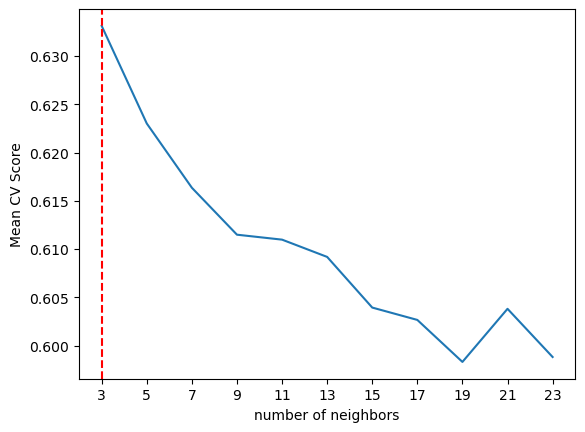

In [22]:
plt.plot(param, grid.cv_results_['mean_test_score'])

plt.xticks(param)
plt.ylabel('Mean CV Score')
plt.xlabel('number of neighbors')

plt.axvline(
    x=best_knn.n_neighbors,
    color='red',
    ls='--')

In [23]:
#We are hihgest at 3 neighbors

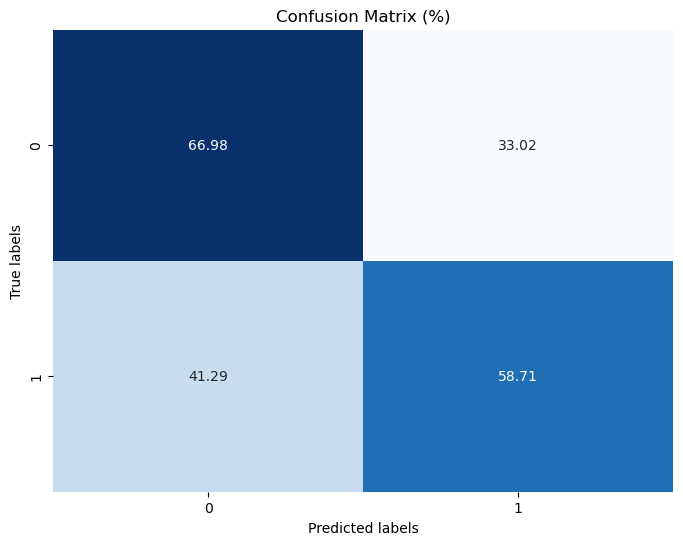

In [24]:
# Compute confusion matrix
from sklearn.metrics import confusion_matrix
#cm = confusion_matrix(y_tst, y_trn)

# Predict on test data
y_pred = best_knn.predict(X_tst)

# Compute confusion matrix
cm = confusion_matrix(y_tst, y_pred)

# Normalize confusion matrix to get percentages
cm_percentage = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis] * 100

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm_percentage, annot=True, cmap='Blues', fmt='.2f', cbar=False)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix (%)')
plt.show()

In [ ]:
#WE have a 32.48 % as false negetive and 24.76% as false posiive 

In [25]:
print('Accuracy on testing data: ' + str("{:.2%}".format(knn.score(X_tst,y_tst))))

Accuracy on testing data: 63.56%


In [ ]:
#not the best of the Accuracy - that said this is not a easy problem to crack either.

In [26]:
# Sample future projected weather data (replace this with your actual data)
future_data = {
    'P0': [2024],
    'P1': [6],
    'P2': [15],
    'P3': [20],
    'P4': [95.7]
}

# Create a dataframe for future projected weather data
df_future = pd.DataFrame(future_data)

# Ensure the feature names match those used during training
df_future = df_future[X_trn.columns]

# Predict wetland presence for future data
predicted_wetland = best_knn.predict(df_future)

# Print the predicted result
print("Predicted wetland presence:", predicted_wetland)

Predicted wetland presence: [1]


In [56]:
'''Testing the future data'''
#read the Binga data file
df_future1 = pd.read_csv('./SSP126_Chitongo_climate_data1.csv')
print(df_future1.head(10))

# Create a dataframe for future projected weather data
df_future1 = pd.DataFrame(df_future1)


# Create a new DataFrame to store the expanded data
expanded_rows = []

for index, row in df_future1.iterrows():
    start_year, end_year = map(int, row['P0'].split('-'))
    for year in range(start_year, end_year + 1):
        new_row = row.copy()
        new_row['P0'] = year
        expanded_rows.append(new_row)

# Concatenate all new rows into a new DataFrame
expanded_data = pd.concat([pd.DataFrame([row]) for row in expanded_rows], ignore_index=True)

print(expanded_data.head())

# Ensure the feature names match those used during training
#df_future1 = df_future1[X_trn.columns]

# Predict wetland presence for future data

predicted_wetland = best_knn.predict(expanded_data)
mean_prediction = np.mean(predicted_wetland)

# Print the predicted result
print("Predicted wetland presence:", mean_prediction)

# Calculate the median of the predictions
median_prediction = np.median(predicted_wetland)

# Print the median of the predicted wetland presence
print("Median predicted wetland presence:", median_prediction)


          P0  P1    P2         P3   P4
0  2021-2040   1  20.5  30.600000  166
1  2021-2040   2  20.1  30.200001  179
2  2021-2040   3  19.5  31.400000   77
3  2021-2040   4  18.0  30.900000   26
4  2021-2040   5  13.9  29.100000    5
5  2021-2040   6  11.4  27.200001    1
6  2021-2040   7  10.8  27.200001    0
7  2021-2040   8  13.4  29.799999    0
8  2021-2040   9  17.4  34.099998    2
9  2021-2040  10  21.0  36.299999   20
     P0  P1    P2    P3   P4
0  2021   1  20.5  30.6  166
1  2022   1  20.5  30.6  166
2  2023   1  20.5  30.6  166
3  2024   1  20.5  30.6  166
4  2025   1  20.5  30.6  166
Predicted wetland presence: 0.4375
Median predicted wetland presence: 0.0


In [61]:
# Directory of the future data files
data_directory = './Data_Future'

# Ensure you have the correct feature names as used in training
# X_trn_columns = ... (list of column names)

# Loop over each file in the Data_Future folder
for filename in os.listdir(data_directory):
    if filename.endswith('.csv'):  # Check for CSV files
        file_path = os.path.join(data_directory, filename)
        df_future = pd.read_csv(file_path)

        # Assuming 'P0' contains the year ranges and needs to be processed
        df_future['P0'] = df_future['P0'].astype(str)  # Convert to string if necessary
        expanded_rows = []
        for _, row in df_future.iterrows():
            start_year, end_year = map(int, row['P0'].split('-'))
            for year in range(start_year, end_year + 1):
                new_row = row.copy()
                new_row['P0'] = year  # Replace 'P0' with the year
                expanded_rows.append(new_row)

        expanded_data = pd.concat([pd.DataFrame([row]) for row in expanded_rows], ignore_index=True)

        # If the model expects different column names, ensure the columns match
        if set(X_trn.columns).issubset(expanded_data.columns):
            expanded_data = expanded_data[X_trn.columns]
        else:
            raise ValueError(f"Columns in {filename} do not match training data columns.")

        # Predict wetland presence for future data
        predicted_wetland = best_knn.predict(expanded_data)
        mean_prediction = np.mean(predicted_wetland)
        median_prediction = np.median(predicted_wetland)

        # Print the results
        print(f"File: {filename}")
        print("Predicted wetland presence (Mean):", mean_prediction)
        print("Predicted wetland presence (Median):", median_prediction)
        print("\n")  # Print a newline for better readability

File: SSP126_Chinyerenyere_climate_data.csv
Predicted wetland presence (Mean): 0.39166666666666666
Predicted wetland presence (Median): 0.0


File: SSP126_Chitongo_climate_data.csv
Predicted wetland presence (Mean): 0.4375
Predicted wetland presence (Median): 0.0


File: SSP126_Simbumbumbu_climate_data.csv
Predicted wetland presence (Mean): 0.13020833333333334
Predicted wetland presence (Median): 0.0


File: SSP245_Chinyerenyere_climate_data.csv
Predicted wetland presence (Mean): 0.290625
Predicted wetland presence (Median): 0.0


File: SSP245_Chitongo_climate_data.csv
Predicted wetland presence (Mean): 0.5364583333333334
Predicted wetland presence (Median): 1.0


File: SSP245_Simbumbumbu_climate_data.csv
Predicted wetland presence (Mean): 0.22291666666666668
Predicted wetland presence (Median): 0.0


File: SSP370_Chinyerenyere_climate_data.csv
Predicted wetland presence (Mean): 0.325
Predicted wetland presence (Median): 0.0


File: SSP370_Chitongo_climate_data.csv
Predicted wetland pr

In [23]:
#testing RandomForest

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

# Initialize the Random Forest classifier
rf = RandomForestClassifier(random_state=42)

# Define a parameter grid to search for the best parameters for Random Forest
param_grid = {
    'n_estimators': [100, 200, 300],  # Number of trees in the forest
    'max_depth': [None, 10, 20, 30],  # Maximum depth of the tree
    # Consider adding more parameters here
}

# Set up GridSearchCV object
grid_search_rf = GridSearchCV(rf, param_grid, cv=5)  # cv=5 for 5-fold cross-validation

# Fit the grid search object to find the best model
best_rf = grid_search_rf.fit(X_trn, y_trn)

# Display the best parameters
print("Best parameters found: ", best_rf.best_params_)

# Use the best estimator to make predictions
print('Accuracy on training data: {:.2%}'.format(best_rf.score(X_trn, y_trn)))


Best parameters found:  {'max_depth': None, 'n_estimators': 300}
Accuracy on training data: 99.88%


In [24]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# X_test and y_test are your test features and labels

# Use the best model from grid search to make predictions on the test set
y_pred = best_rf.predict(X_test)

# Calculate metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='macro')  # 'macro' for unweighted mean, consider 'weighted' for imbalanced classes
recall = recall_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')
conf_matrix = confusion_matrix(y_test, y_pred)

# Print the metrics
print(f'Accuracy: {accuracy:.2%}')
print(f'Precision: {precision:.2%}')
print(f'Recall: {recall:.2%}')
print(f'F1 Score: {f1:.2%}')
print('Confusion Matrix:')
print(conf_matrix)


Accuracy: 76.43%
Precision: 76.35%
Recall: 76.29%
F1 Score: 76.31%
Confusion Matrix:
[[1400  381]
 [ 408 1159]]


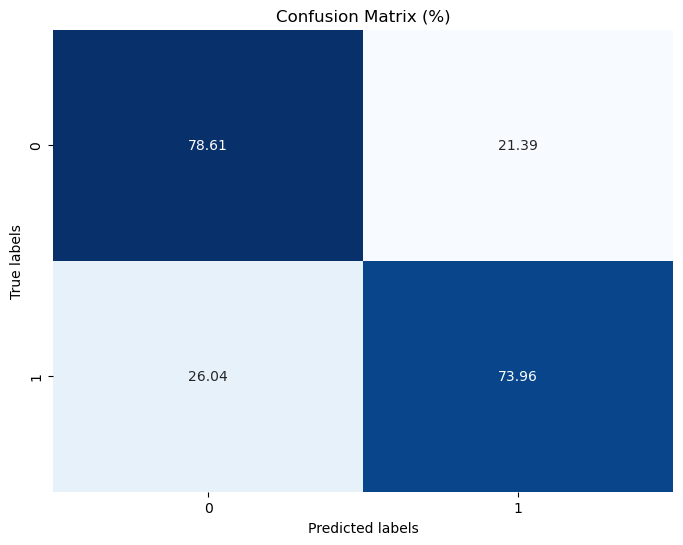

In [30]:
# Normalize confusion matrix to get percentages
cm_percentage = conf_matrix.astype('float') / conf_matrix.sum(axis=1)[:, np.newaxis] * 100

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm_percentage, annot=True, cmap='Blues', fmt='.2f', cbar=False)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix (%)')
plt.show()